<a href="https://colab.research.google.com/github/kpanwala/Kaggle-datasets-explored/blob/main/Heart_stroke_kalp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install -q kaggle

In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"kalppanwala","key":"006aac11f0e353047545a5fa5b4b6f04"}'}

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d fedesoriano/stroke-prediction-dataset

stroke-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [8]:
import zipfile
with zipfile.ZipFile('./stroke-prediction-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

In [9]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [11]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [12]:
for column in data.columns:
     print("\n" + column)
     print(data[column].value_counts())
     print("#######################################")


id
9046     1
22194    1
15104    1
28315    1
56996    1
        ..
897      1
4789     1
5686     1
37451    1
44679    1
Name: id, Length: 5110, dtype: int64
#######################################

gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
#######################################

age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64
#######################################

hypertension
0    4612
1     498
Name: hypertension, dtype: int64
#######################################

heart_disease
0    4834
1     276
Name: heart_disease, dtype: int64
#######################################

ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64
#######################################

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name:

Age is not proper so rounding off

In [13]:
data['age'] = data['age'].apply(lambda x: math.ceil(x))
data['age'].value_counts()

2     127
78    102
57     95
52     90
54     87
     ... 
11     36
10     35
4      34
7      32
6      24
Name: age, Length: 82, dtype: int64

In [14]:
# print(np.percentile(data['bmi'][:], 50))
print(data['bmi'].isna().sum(),data['avg_glucose_level'].isna().sum())

201 0


bmi has 201 na values which we will fill with mean

In [15]:
mean_value_bmi = data['bmi'].mean()
data['bmi'].fillna(value=mean_value_bmi, inplace=True)

print('Updated bmi na counts:')
print(data['bmi'].isna().sum())

Updated bmi na counts:
0


We can divide the whole bmi and avg glucose data into bins as per percentile

In [16]:
min_value_glu = data['avg_glucose_level'].min()
max_value_glu = data['avg_glucose_level'].max()

min_value_bmi = data['bmi'].min()
max_value_bmi = data['bmi'].max()

min_value_age = data['age'].min()
max_value_age = data['age'].max()

bins_glu = np.linspace(min_value_glu,max_value_glu,10)
bins_bmi = np.linspace(min_value_bmi,max_value_bmi,4)

print(bins_glu,bins_bmi)

[ 55.12        79.18888889 103.25777778 127.32666667 151.39555556
 175.46444444 199.53333333 223.60222222 247.67111111 271.74      ] [10.3 39.4 68.5 97.6]


As we filled the na values now let us check how our data looks like

In [17]:
data[['bmi','avg_glucose_level']].describe()

,bmi,avg_glucose_level
count,5110.000000,5110.000000
mean,28.893237,106.147677
std,7.698018,45.283560
min,10.300000,55.120000
25%,23.800000,77.245000
50%,28.400000,91.885000
75%,32.800000,114.090000
max,97.600000,271.740000


In [18]:
np.percentile(data['bmi'], 25)

23.8

In [19]:
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

We can divide the whole bmi and avg glucose data into bins as per fixed range

In [20]:
bins_bmi = [ min_value_bmi,np.percentile(data['bmi'], 25), np.percentile(data['bmi'], 50), np.percentile(data['bmi'], 75), max_value_bmi]
labels_bmi = [ 'Below 25 percentile', 'Between 25 to 50 percentile', 'Between 50 to 75  percentile', 'Between 75 to 100 percentile']

data['bmi'] = pd.cut(data['bmi'] , bins=bins_bmi, labels=labels_bmi, include_lowest=True)

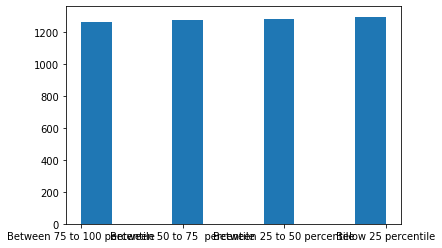

In [21]:
plt.hist(data['bmi'])
plt.show()

In [22]:
bins_glu = [ min_value_glu,np.percentile(data['avg_glucose_level'], 25), np.percentile(data['avg_glucose_level'], 50), np.percentile(data['avg_glucose_level'], 75), max_value_glu]
labels_glu = [ 'Below 25 percentile', 'Between 25 to 50 percentile', 'Between 50 to 75  percentile', 'Between 75 to 100 percentile']

data['avg_glucose_level'] = pd.cut(data['avg_glucose_level'] , bins=bins_glu, labels=labels_glu, include_lowest=True)

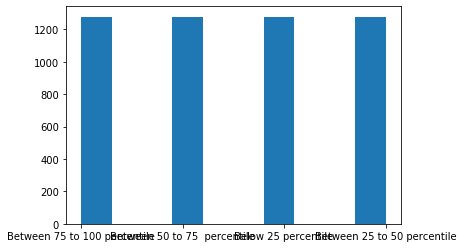

In [23]:
plt.hist(data['avg_glucose_level'])
plt.show()

Now we can apply one hot encoding or label encoding but from my past experience I have learnt one hot encoding is a superior method.

In [24]:
bins_age = [1,15,30,45,60,100]
labels_age = ['Below 10','15-30','30-45','45-60','Above 60']
data['age'] = pd.cut(data['age'], bins=bins_age, labels=labels_age, include_lowest=True)

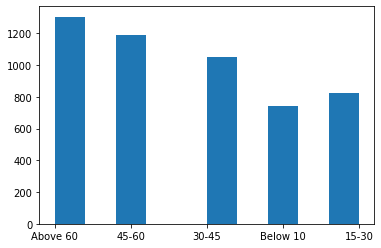

In [25]:
plt.hist(data['age'])
plt.show()

In [26]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]], drop_first=True)
    res = pd.concat([original_dataframe.loc[:, original_dataframe.columns != feature_to_encode], dummies], axis=1)
    return(res)

In [27]:
data = encode_and_bind(data, 'bmi')
data = encode_and_bind(data, 'avg_glucose_level')
data = encode_and_bind(data, 'gender')
data = encode_and_bind(data, 'work_type')
data = encode_and_bind(data, 'Residence_type')
data = encode_and_bind(data, 'smoking_status')
data = encode_and_bind(data, 'ever_married')
data = encode_and_bind(data, 'age')
data.head()

,id,hypertension,heart_disease,stroke,bmi_Between 25 to 50 percentile,bmi_Between 50 to 75 percentile,bmi_Between 75 to 100 percentile,avg_glucose_level_Between 25 to 50 percentile,avg_glucose_level_Between 50 to 75 percentile,avg_glucose_level_Between 75 to 100 percentile,...,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,ever_married_Yes,age_15-30,age_30-45,age_45-60,age_Above 60
0,9046,0,1,1,0,0,1,0,0,1,...,0,1,1,0,0,1,0,0,0,1
1,51676,0,0,1,0,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1
2,31112,0,1,1,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
3,60182,0,0,1,0,0,1,0,0,1,...,0,1,0,0,1,1,0,0,1,0
4,1665,1,0,1,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1


In [28]:
data.columns

Index(['id', 'hypertension', 'heart_disease', 'stroke',
       'bmi_Between 25 to 50 percentile', 'bmi_Between 50 to 75  percentile',
       'bmi_Between 75 to 100 percentile',
       'avg_glucose_level_Between 25 to 50 percentile',
       'avg_glucose_level_Between 50 to 75  percentile',
       'avg_glucose_level_Between 75 to 100 percentile', 'gender_Male',
       'gender_Other', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'ever_married_Yes', 'age_15-30', 'age_30-45',
       'age_45-60', 'age_Above 60'],
      dtype='object')

Now that we have data cleared and normalized Lets predict

In [29]:
columns_To_Train = ['hypertension', 'heart_disease',
       'bmi_Between 25 to 50 percentile', 'bmi_Between 50 to 75  percentile',
       'bmi_Between 75 to 100 percentile',
       'avg_glucose_level_Between 25 to 50 percentile',
       'avg_glucose_level_Between 50 to 75  percentile',
       'avg_glucose_level_Between 75 to 100 percentile', 'gender_Male',
       'gender_Other', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'ever_married_Yes', 'age_15-30', 'age_30-45',
       'age_45-60', 'age_Above 60']

In [30]:
len(columns_To_Train)

23

In [31]:
x = data[columns_To_Train].values
 
# output
y = data['stroke'].values

As the data is imbalanced we can use undersampling or oversampling or some alogs like SMOTE which runs KNN also for minority classes

In [32]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

print('Original dataset and after smote', len(x), len(x_smote))

Original dataset and after smote 5110 9722


In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.25, random_state=0)

In [34]:
len(x_train),len(y_train)

(7291, 7291)

Regression models 

In [35]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
 
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[ 945  271]
 [ 151 1064]]


In [37]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.8264088852324146


In [38]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_test, y_pred, average='weighted')

(0.8296284260989178, 0.8264088852324146, 0.8259884223246731, None)

In [39]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.8264291612518953

       . 

       .   

XGBoost algo

In [40]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
 
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[ 941  275]
 [  81 1134]]


In [42]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.853558206499383


In [43]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_test, y_pred, average='weighted')

(0.8628087203985554, 0.853558206499383, 0.8526245219650217, None)

In [44]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.8535910087719298

XGBoost in general is known for surpassing every algo in terms of precision, accuracy,roc curve

But for my satisfaction i am also applying random forest 

In [45]:
from sklearn.ensemble import RandomForestClassifier

clf_50 = RandomForestClassifier(n_estimators = 50)
clf_100 = RandomForestClassifier(n_estimators = 100)
clf_200 = RandomForestClassifier(n_estimators = 200)
clf_500 = RandomForestClassifier(n_estimators = 500)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_50.fit(x_train, y_train)
clf_100.fit(x_train, y_train)
clf_200.fit(x_train, y_train)
clf_500.fit(x_train, y_train)
 
# performing predictions on the test dataset
y_pred_50 = clf_50.predict(x_test)
y_pred_100 = clf_100.predict(x_test)
y_pred_200 = clf_200.predict(x_test)
y_pred_500 = clf_500.predict(x_test)

In [46]:
from sklearn.metrics import confusion_matrix

cm_50 = confusion_matrix(y_test, y_pred_50)
cm_100 = confusion_matrix(y_test, y_pred_100)
cm_200 = confusion_matrix(y_test, y_pred_200)
cm_500 = confusion_matrix(y_test, y_pred_500)
 
print(cm_50)
print(cm_100)
print(cm_200)
print(cm_500)

[[1086  130]
 [  39 1176]]
[[1088  128]
 [  38 1177]]
[[1088  128]
 [  37 1178]]
[[1090  126]
 [  37 1178]]


In [47]:
from sklearn.metrics import accuracy_score

print("Accuracy 50: ", accuracy_score(y_test, y_pred_50))
print("Accuracy 100: ", accuracy_score(y_test, y_pred_100))
print("Accuracy 200: ", accuracy_score(y_test, y_pred_200))
print("Accuracy 500: ", accuracy_score(y_test, y_pred_500))

Accuracy 50:  0.93048128342246
Accuracy 100:  0.9317153434800494
Accuracy 200:  0.9321266968325792
Accuracy 500:  0.9329494035376388


In [48]:
from sklearn.metrics import precision_recall_fscore_support

print(precision_recall_fscore_support(y_test, y_pred_50, average='weighted'))
print(precision_recall_fscore_support(y_test, y_pred_100, average='weighted'))
print(precision_recall_fscore_support(y_test, y_pred_200, average='weighted'))
print(precision_recall_fscore_support(y_test, y_pred_500, average='weighted'))

(0.9329097187531563, 0.93048128342246, 0.9303848091775363, None)
(0.9340971970502989, 0.9317153434800494, 0.9316226672809785, None)
(0.9345643551016038, 0.9321266968325792, 0.9320325060017366, None)
(0.9352849760011558, 0.9329494035376388, 0.9328604271298289, None)


# **Explanability**

# **Permutation Importance** - What features does our model think have biggest impact on the prediction.

In [49]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(clf_100, random_state=1).fit(x_train, y_train)
eli5.show_weights(perm, feature_names = columns_To_Train)

Weight,Feature
0.0969 ± 0.0024,age_Above 60
0.0815 ± 0.0036,Residence_type_Urban
0.0813 ± 0.0055,smoking_status_never smoked
0.0807 ± 0.0037,gender_Male
0.0709 ± 0.0069,avg_glucose_level_Between 75 to 100 percentile
0.0655 ± 0.0020,age_30-45
0.0634 ± 0.0023,avg_glucose_level_Between 50 to 75 percentile
0.0618 ± 0.0044,ever_married_Yes
0.0598 ± 0.0037,bmi_Between 50 to 75 percentile
0.0589 ± 0.0038,avg_glucose_level_Between 25 to 50 percentile


THe more +the value of a atribute more it contributes in successful predictions.

# **Partial plots** - Feature Importance shows what variables most affect predictions, partial dependence plots show how a feature affects predictions.

In [52]:
!pip install pdpbox
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


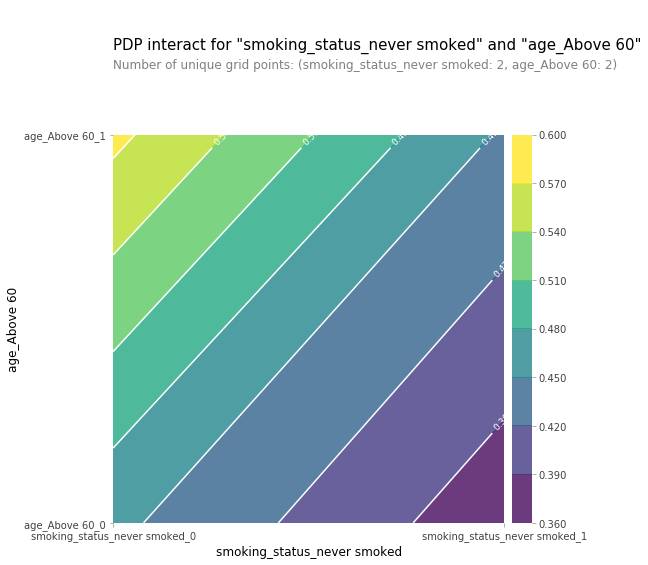

In [53]:
# Similar to previous PDP plot except we use pdp_interact instead of pdp_isolate and pdp_interact_plot instead of pdp_isolate_plot
features_to_plot = ['smoking_status_never smoked', 'age_Above 60']
inter1  =  pdp.pdp_interact(model=clf_100, dataset=pd.DataFrame(x_train,columns=columns_To_Train), model_features=columns_To_Train, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

The above 2D partial plot implies that one who is above 60 years and has smoked is on greater risk of having heart stroke.

# Shap Values

In [67]:
!pip install shap
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(clf_100)

data_for_prediction_array = x_train[0].reshape(1, -1)
# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction_array)

In [72]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction_array, feature_names= columns_To_Train)

Feature values causing increased predictions are in pink, and their visual size shows the magnitude of the feature's effect. 

Features which has max contribution in giving a heart stroke
1.   If the age is above 60, it has maximum positive contribution the most
2.   Followed by smoking (never_smoked=0)
3.   Succesively followed by bmi in 75 to 100 percentile.

Features which have negative contribution in giving a heart stroke (good for health)
1.   Self-employed
2.   gender male





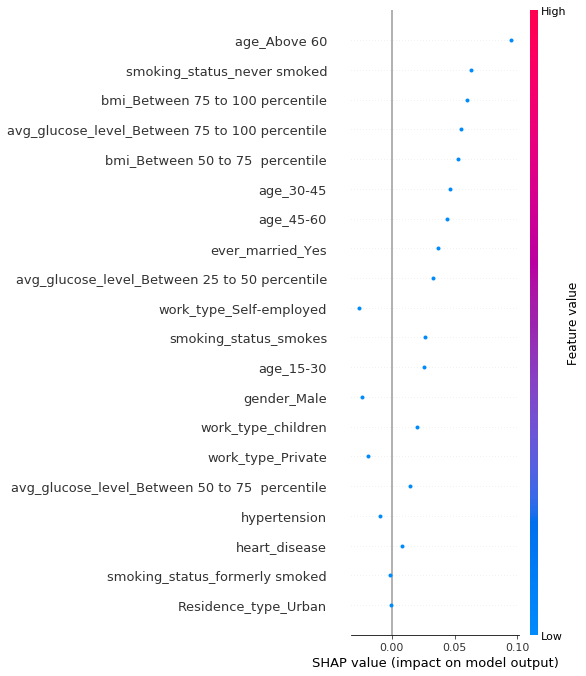

In [71]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(clf_100)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(data_for_prediction_array)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], data_for_prediction_array, feature_names= columns_To_Train)

From above graph we can conclude that the features on right have more influence causing heart stroke than on the left ones.

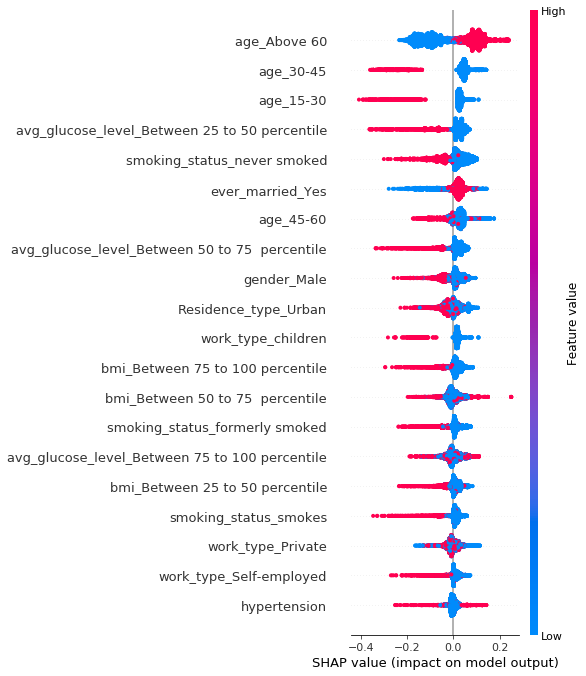

In [73]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(clf_100)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(x_train)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], x_train, feature_names= columns_To_Train)